In [30]:
!pip install pillow

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from PIL import Image

In [42]:
# Step 1: Load and flatten images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path).convert("L")  # Convert to grayscale
        img_resized = img.resize((100, 100))  # Resize to 100x100 pixels
        img_normalized = np.array(img_resized) / 255.0  # Normalize pixel values (0-1)
        images.append(img_normalized.flatten())  # Flatten into a 1D array
    return np.array(images)

# Paths to images
image_paths = ['face1.jpg', 'face2.jpg', 'face3.jpg']  
X = load_images(image_paths)  # Shape: (3, 10000)


In [43]:
# Step 2: Transpose for ICA compatibility
S = X  # Sources: shape (3, 10000)

# Step 3: Create a better mixing matrix
A = np.array([[1, 0.5, 0.2],
              [0.3, 1, 0.4],
              [0.2, 0.3, 1]])  # Ensure no overly strong correlations between signals

# Perform the mixing
X_mixed = np.dot(A, S)  # Mixed signals: shape (3, 10000)

In [44]:
# Applying ICA to separate the sources
ica = FastICA(n_components=3, random_state=0)
S_ = ica.fit_transform(X_mixed.T).T  # Separated sources: shape (3, 10000)

# Normalizes separated signals to the 0-255 grayscale range
def normalize_signal(signal):
    signal = signal - signal.min()  # Shifts to have a minimum of 0
    signal = signal / signal.max() * 255  # Scales to 0-255
    return signal.astype(np.uint8)  # Converts to integers

S_images = [normalize_signal(s).reshape(100, 100) for s in S_]

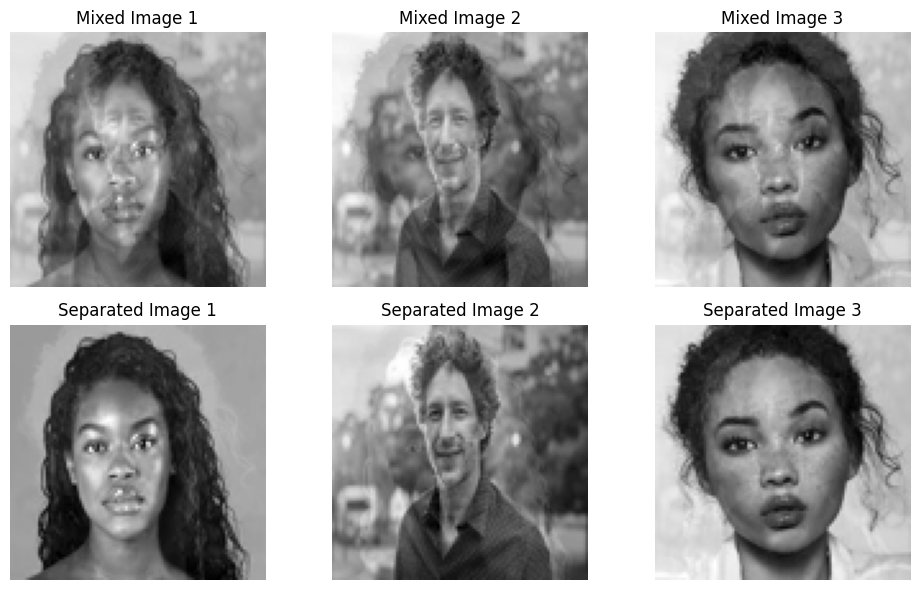

In [45]:
# Visualisation of the mixed and separated signals
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Ploting the mixed images
for i in range(3):
    axes[0, i].imshow(X_mixed[i].reshape(100, 100), cmap='gray')
    axes[0, i].set_title(f"Mixed Image {i+1}")
    axes[0, i].axis('off')

# To plot the separated images
for i in range(3):
    axes[1, i].imshow(S_images[i], cmap='gray')
    axes[1, i].set_title(f"Separated Image {i+1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()